In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval
from elite_optionstrategy import BacktestingEngine

from buy_straddle_strategy import BuyStraddleStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)

engine.add_strategy(BuyStraddleStrategy, {})

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 729/729 [37:15<00:00,  3.07s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-02-02 14:42:28.989394	开始计算逐日盯市盈亏
2024-02-02 14:42:28.994147	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2021-01-04            2   17780.0         0.0     152.0       -800.0   
2021-01-05            0       0.0         0.0       0.0          0.0   
2021-01-06            0       0.0         0.0       0.0          0.0   
2021-01-07            0       0.0         0.0       0.0          0.0   
2021-01-08            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2022-12-26            0       0.0         0.0       0.0          0.0   
2022-12-27            0       0.0         0.0       0.0          0.0   
2022-12-28            0       0.0         0.0       0.0          0.0   
2022-12-29            0       0.0         0.0       0.0          0.0   
2022-12-30            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0     -800.0   -952.0  
2021-01-05       4900.0     4900.0   4900.0  
2021-01-06       3500.0     3500.0   3500.0  
2021-01-07       9620.0     9620.0   9620.0  
2021-01-08      -3080.0    -3080.0  -3080.0  
...                 ...        ...      ...  
2022-12-26      -1080.0    -1080.0  -1080.0  
2022-12-27      -2960.0    -2960.0  -2960.0  
2022-12-28        360.0      360.0    360.0  
2022-12-29        580.0      580.0    580.0  
2022-12-30      -1540.0    -1540.0  -1540.0  

[485 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-02-02 14:42:29.023567	开始计算策略统计指标
2024-02-02 14:42:29.030387	------------------------------
2024-02-02 14:42:29.030387	首个交易日：	2021-01-04 00:00:00
2024-02-02 14:42:29.030387	最后交易日：	2022-12-30 00:00:00
2024-02-02 14:42:29.030387	总交易日：	485
2024-02-02 14:42:29.030387	盈利交易日：	202
2024-02-02 14:42:29.030387	亏损交易日：	283
2024-02-02 14:42:29.030387	起始资金：	1,000,000.00
2024-02-02 14:42:29.030387	结束资金：	958,652.00
2024-02-02 14:42:29.030387	总收益率：	-4.13%
2024-02-02 14:42:29.031431	年化收益：	-2.05%
2024-02-02 14:42:29.031431	最大回撤: 	-119,868.00
2024-02-02 14:42:29.031431	最大回撤%: 	-11.11%
2024-02-02 14:42:29.031431	总盈亏：	-41,348.00
2024-02-02 14:42:29.031431	总手续费：	0.00
2024-02-02 14:42:29.031431	总滑点：	7,448.00
2024-02-02 14:42:29.031431	总成交金额：	1,091,200.00
2024-02-02 14:42:29.031431	总成交笔数：	98
2024-02-02 14:42:29.031431	日均盈亏：	-85.25
2024-02-02 14:42:29.031431	日均手续费：	0.00
2024-02-02 14:42:29.031431	日均滑点：	15.36
2024-02-02 14:42:29.031431	日均成交金额：	2,249.90
2024-02-02 14:42:29.031431	日均成交笔数：	0.2020618556701031
20

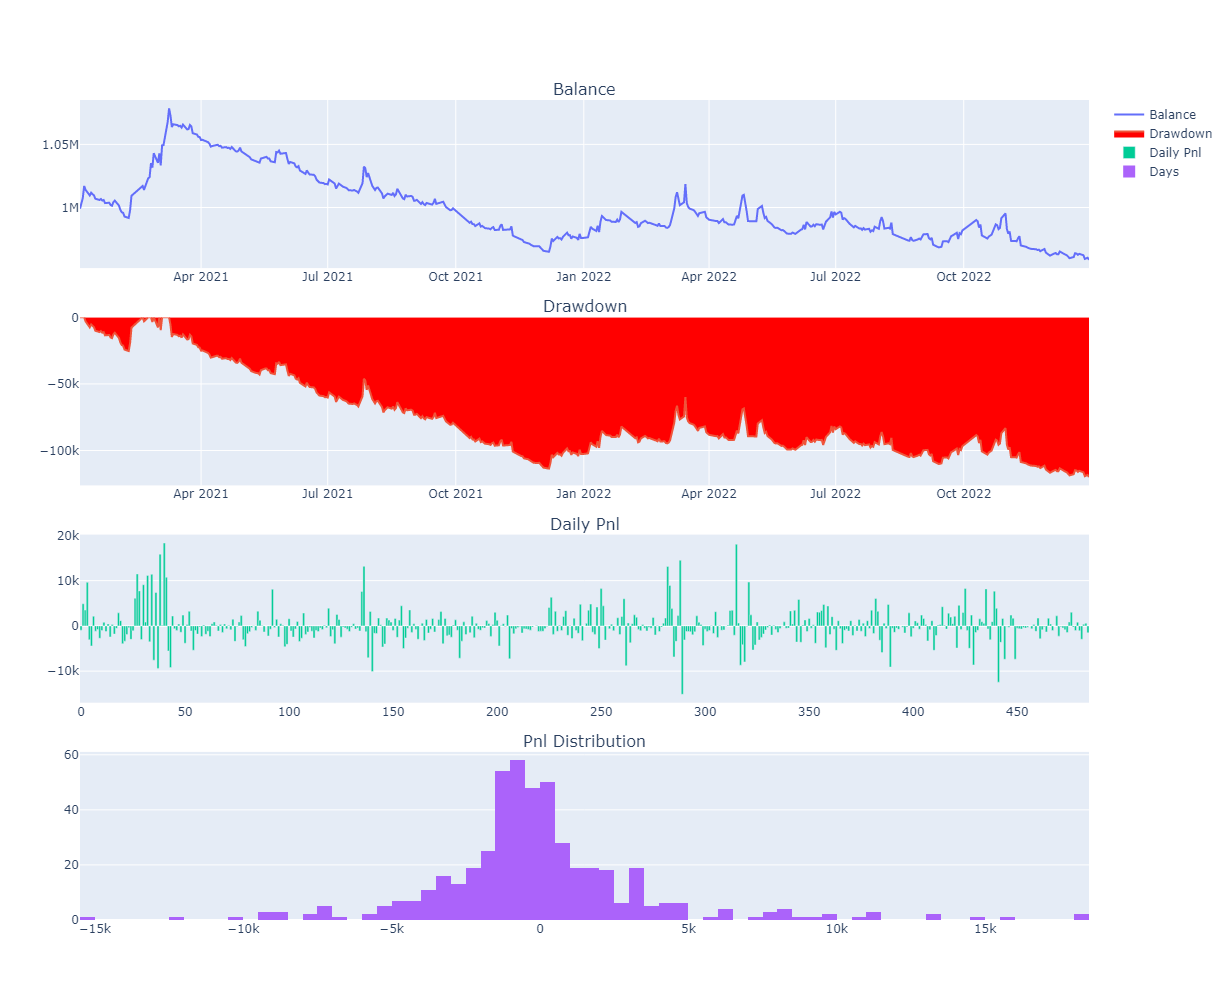

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2021-01-04 09:31:00+08:00 IO2101-P-5200.CFFEX 多 开 1 @ 72.0
2021-01-04 09:31:00+08:00 IO2101-C-5200.CFFEX 多 开 1 @ 105.8
2021-01-11 09:31:00+08:00 IO2102-P-5500.CFFEX 多 开 1 @ 178.0
2021-01-11 09:31:00+08:00 IO2101-P-5200.CFFEX 空 平 1 @ 6.6
2021-01-11 09:31:00+08:00 IO2101-C-5200.CFFEX 空 平 1 @ 315.2
2021-01-11 09:31:00+08:00 IO2102-C-5500.CFFEX 多 开 1 @ 188.2
2021-02-18 09:31:00+08:00 IO2103-C-5900.CFFEX 多 开 1 @ 180.0
2021-02-18 09:31:00+08:00 IO2102-P-5500.CFFEX 空 平 1 @ 1.0
2021-02-18 09:31:00+08:00 IO2103-P-5900.CFFEX 多 开 1 @ 174.8
2021-02-18 09:31:00+08:00 IO2102-C-5500.CFFEX 空 平 1 @ 414.6
2021-03-15 09:31:00+08:00 IO2103-C-5900.CFFEX 空 平 1 @ 0.8
2021-03-15 09:31:00+08:00 IO2104-P-5100.CFFEX 多 开 1 @ 147.8
2021-03-15 09:31:00+08:00 IO2104-C-5100.CFFEX 多 开 1 @ 134.2
2021-03-15 09:31:00+08:00 IO2103-P-5900.CFFEX 空 平 1 @ 827.6
2021-04-12 09:31:00+08:00 IO2104-P-5100.CFFEX 空 平 1 @ 98.8
2021-04-12 09:31:00+08:00 IO2105-C-5000.CFFEX 多 开 1 @ 110.4
2021-04-12 09:31:00+08:00 IO2104-C-5100.CFFEX 空 